<a href="https://colab.research.google.com/github/FKz11/study_mpei/blob/main/vm_idz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ИДЗ 1

### Вариант 13

### Условие:

In [ ]:
"""
#if 0
 const int var = 13; // номер варианта
// Описание обстановки
 const int kB1 = 2, fB1 = 10; // контур и фон для фигуры 1
 static double Bx1 [] = { 0.000, 0.000, 1.253, 2.278 };
 static double By1 [] = { 4.982, 1.426, 1.371, 4.982 };
 const int kB2 = 5, fB2 = 13; // контур и фон для фигуры 2
 static double Bx2 [] = { 2.136, 2.431, 3.619, 3.619 };
 static double By2 [] = { 2.247, 1.459, 1.459, 3.964 };
 const int kB3 = 3, fB3 = 11; // контур и фон для фигуры 3
 static double Bx3 [] = { 4.275, 4.275, 4.812, 4.812 };
 static double By3 [] = { 0.002, 2.601, 2.601, 0.002 };
 const int kB4 = 14, fB4 = 14; // контур и фон для фигуры 4
 static double Bx4 [] = { 5.089, 6.389, 6.931, 6.931 };
 static double By4 [] = { 3.891, 2.600, 2.408, 4.891 };
// Описание координат опорных точек
 static int Na = 2;
 static double Xa [] = { 0.42, 7.52 };
 static double Ya [] = { 0.55, 3.47 };
 static int Nb = 2;
 static double Xb [] = { 0.42, 7.52 };
 static double Yb [] = { 0.55, 3.47 };
 static int Nc = 2;
 static double Xc [] = { 0.42, 7.52 };
 static double Yc [] = { 0.55, 3.47 };
#endif
"""

### Библиотеки

In [326]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Перепишем условие на питон:

In [327]:
# Обстановка
B1 = np.array([[0.000, 4.982], [0.000, 1.426], [1.253, 1.371], [2.278, 4.982]]) # x, y
B2 = np.array([[2.136, 2.247], [2.431, 1.459], [3.619, 1.459], [3.619, 3.964]]) # x, y
B3 = np.array([[4.275, 0.002], [4.275, 2.601], [4.812, 2.601], [4.812, 0.002]]) # x, y
B4 = np.array([[5.089, 3.891], [6.389, 2.600], [6.931, 2.408], [6.931, 4.891]]) # x, y
# Опорные точки
A = np.array([[0.42, 0.55], [7.52, 3.47]]) # x, y
B = np.array([[0.42, 0.55], [7.52, 3.47]]) # x, y
C = np.array([[0.42, 0.55], [7.52, 3.47]]) # x, y

Посмотрим на обстановку

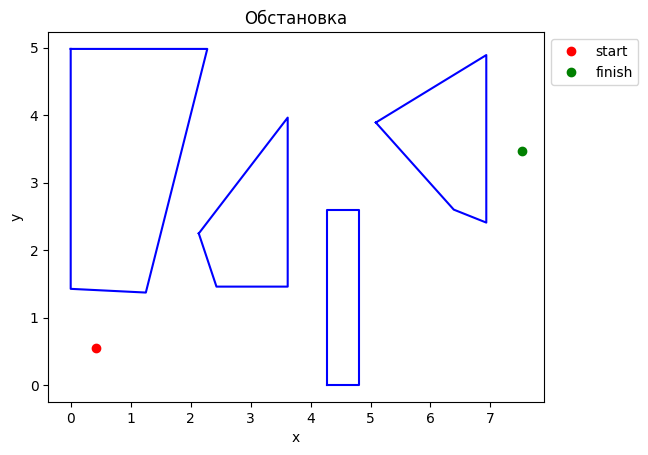

In [328]:
plt.title('Обстановка')
plt.plot(list(B1[:,0]) + list(B1[:1,0]), list(B1[:,1]) + list(B1[:1,1]), color = 'b')
plt.plot(list(B2[:,0]) + list(B2[:1,0]), list(B2[:,1]) + list(B2[:1,1]), color = 'b')
plt.plot(list(B3[:,0]) + list(B3[:1,0]), list(B3[:,1]) + list(B3[:1,1]), color = 'b')
plt.plot(list(B4[:,0]) + list(B4[:1,0]), list(B4[:,1]) + list(B4[:1,1]), color = 'b')
plt.plot(A[0,0], A[0,1], 'or', label = 'start')
plt.plot(A[1,0], A[1,1], 'og', label = 'finish')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Решение с помощью интерполяционного многочлена Ньютона

## Первый набор точек

Добавляем промежуточные точки:

In [329]:
n = 5
h = (A[1,0] - A[0,0])/n
P1 = [A[0,0] + 1*h, 1.9]
P2 = [A[0,0] + 2*h, 4.2]
P3 = [A[0,0] + 3*h, 3.5]
P4 = [A[0,0] + 4*h, 2.2]
P_list = np.array([P1, P2, P3, P4])

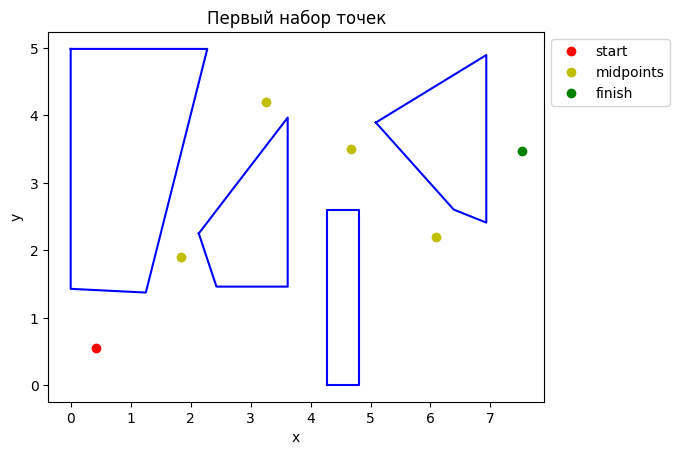

In [330]:
plt.title('Первый набор точек')
plt.plot(list(B1[:,0]) + list(B1[:1,0]), list(B1[:,1]) + list(B1[:1,1]), color = 'b')
plt.plot(list(B2[:,0]) + list(B2[:1,0]), list(B2[:,1]) + list(B2[:1,1]), color = 'b')
plt.plot(list(B3[:,0]) + list(B3[:1,0]), list(B3[:,1]) + list(B3[:1,1]), color = 'b')
plt.plot(list(B4[:,0]) + list(B4[:1,0]), list(B4[:,1]) + list(B4[:1,1]), color = 'b')
plt.plot(A[0,0], A[0,1], 'or', label = 'start')
plt.plot(P_list[0,0], P_list[0,1], 'oy', label='midpoints')
for i in range(1, n-1):
  plt.plot(P_list[i,0], P_list[i,1], 'oy')
plt.plot(A[1,0], A[1,1], 'og', label = 'finish')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Интерполяция зависимоти x(t)

In [331]:
h = 1
t_list = list(range(n+1))
t_list

[0, 1, 2, 3, 4, 5]

Таблица разделённой разности

In [332]:
point_list = np.array([A[0]] + list(P_list) + [A[-1]])
point_list[:,1] = point_list[:,0]
point_list[:,0] = t_list
difference = point_list[:,1]
polynom_coefs = [difference[0]]
difference_table = [np.array(difference).round(5)]
for k in range(n):
  difference = (difference[1:] - difference[:-1])
  polynom_coefs.append(difference[0])
  difference_table.append((k+1)*[' '] + list(difference.round(5)))
np.array(polynom_coefs).round(5)

array([0.42, 1.42, 0.  , 0.  , 0.  , 0.  ])

In [333]:
difference_table = np.array(difference_table).T
difference_table = pd.DataFrame(difference_table, columns=[f'dy_{i}' for i in range(n+1)]).reset_index(drop=True)
difference_table

,dy_0,dy_1,dy_2,dy_3,dy_4,dy_5
0,0.42,,,,,
1,1.84,1.42,,,,
2,3.26,1.42,0.0,,,
3,4.68,1.42,0.0,0.0,,
4,6.1,1.42,0.0,0.0,0.0,
5,7.52,1.42,0.0,0.0,0.0,0.0


Интерполяционный многочлен Ньютона

In [334]:
q = lambda x: (x-point_list[0,0])/h
f_newton = lambda x: sum([polynom_coefs[k] * np.math.prod([q(x)-i for i in range(k)]) / np.math.factorial(k) for k in range(n+1)])

Посмотрим зависимость x(t)

In [335]:
x_newton = np.arange(point_list[0,0], point_list[-1,0], 0.001)
y_newton = list(map(f_newton, x_newton))

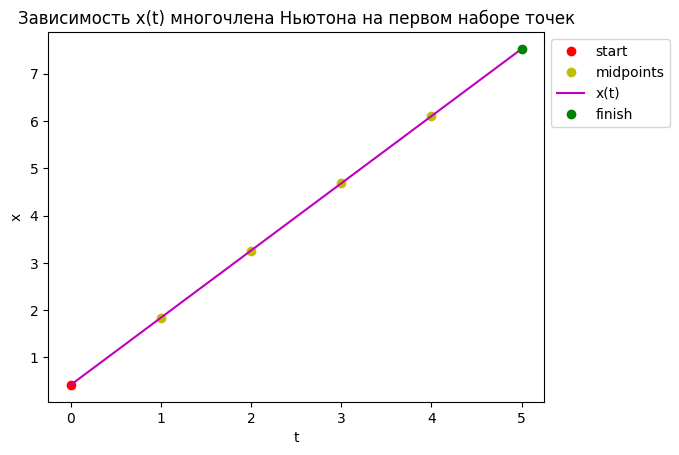

In [336]:
plt.title('Зависимость x(t) многочлена Ньютона на первом наборе точек')
plt.plot(point_list[0,0], point_list[0,1], 'or', label = 'start')
plt.plot(point_list[1,0], point_list[1,1], 'oy', label='midpoints')
for i in range(2, n):
  plt.plot(point_list[i,0], point_list[i,1], 'oy')
plt.plot(x_newton, y_newton, color='m', label='x(t)')
plt.plot(point_list[-1,0], point_list[-1,1], 'og', label = 'finish')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('t')
plt.ylabel('x')
plt.show()

Зависимость линейная, так как брали равно удалённые узлы

### Интерполяция зависимоти y(t)

Таблица разделённой разности

In [337]:
point_list = np.array([A[0]] + list(P_list) + [A[-1]])
point_list[:,0] = t_list
difference = point_list[:,1]
polynom_coefs = [difference[0]]
difference_table = [np.array(difference).round(5)]
for k in range(n):
  difference = (difference[1:] - difference[:-1])
  polynom_coefs.append(difference[0])
  difference_table.append((k+1)*[' '] + list(difference.round(5)))
np.array(polynom_coefs).round(5)

array([ 0.55,  1.35,  0.95, -3.95,  6.35, -5.58])

In [338]:
difference_table = np.array(difference_table).T
difference_table = pd.DataFrame(difference_table, columns=[f'dy_{i}' for i in range(n+1)]).reset_index(drop=True)
difference_table

,dy_0,dy_1,dy_2,dy_3,dy_4,dy_5
0,0.55,,,,,
1,1.9,1.35,,,,
2,4.2,2.3,0.95,,,
3,3.5,-0.7,-3.0,-3.95,,
4,2.2,-1.3,-0.6,2.4,6.35,
5,3.47,1.27,2.57,3.17,0.77,-5.58


Интерполяционный многочлен Ньютона

In [339]:
q = lambda x: (x-point_list[0,0])/h
f_newton = lambda x: sum([polynom_coefs[k] * np.math.prod([q(x)-i for i in range(k)]) / np.math.factorial(k) for k in range(n+1)])

Посмотрим зависимость y(t)

In [340]:
x_newton = np.arange(point_list[0,0], point_list[-1,0], 0.001)
y_newton = list(map(f_newton, x_newton))

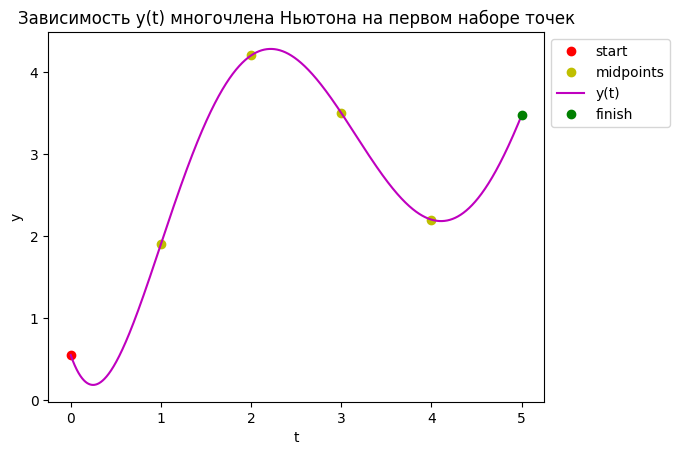

In [341]:
plt.title('Зависимость y(t) многочлена Ньютона на первом наборе точек')
plt.plot(point_list[0,0], point_list[0,1], 'or', label = 'start')
plt.plot(point_list[1,0], point_list[1,1], 'oy', label='midpoints')
for i in range(2, n):
  plt.plot(point_list[i,0], point_list[i,1], 'oy')
plt.plot(x_newton, y_newton, color='m', label='y(t)')
plt.plot(point_list[-1,0], point_list[-1,1], 'og', label = 'finish')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('t')
plt.ylabel('y')
plt.show()

### Интерполяция зависимоти y(x)

In [342]:
h = (A[1,0] - A[0,0])/n

Таблица разделённой разности

In [343]:
point_list = np.array([A[0]] + list(P_list) + [A[-1]])
difference = point_list[:,1]
polynom_coefs = [difference[0]]
difference_table = [np.array(difference).round(5)]
for k in range(n):
  difference = (difference[1:] - difference[:-1])
  polynom_coefs.append(difference[0])
  difference_table.append((k+1)*[' '] + list(difference.round(5)))
np.array(polynom_coefs).round(5)

array([ 0.55,  1.35,  0.95, -3.95,  6.35, -5.58])

In [344]:
difference_table = np.array(difference_table).T
difference_table = pd.DataFrame(difference_table, columns=[f'dy_{i}' for i in range(n+1)]).reset_index(drop=True)
difference_table

,dy_0,dy_1,dy_2,dy_3,dy_4,dy_5
0,0.55,,,,,
1,1.9,1.35,,,,
2,4.2,2.3,0.95,,,
3,3.5,-0.7,-3.0,-3.95,,
4,2.2,-1.3,-0.6,2.4,6.35,
5,3.47,1.27,2.57,3.17,0.77,-5.58


Интерполяционный многочлен Ньютона

In [345]:
q = lambda x: (x-A[0,0])/h
f_newton = lambda x: sum([polynom_coefs[k] * np.math.prod([q(x)-i for i in range(k)]) / np.math.factorial(k) for k in range(n+1)])

Посмотрим траекторию

In [346]:
x_newton_1 = np.arange(A[0,0], A[1,0], 0.001)
y_newton_1 = list(map(f_newton, x_newton_1))

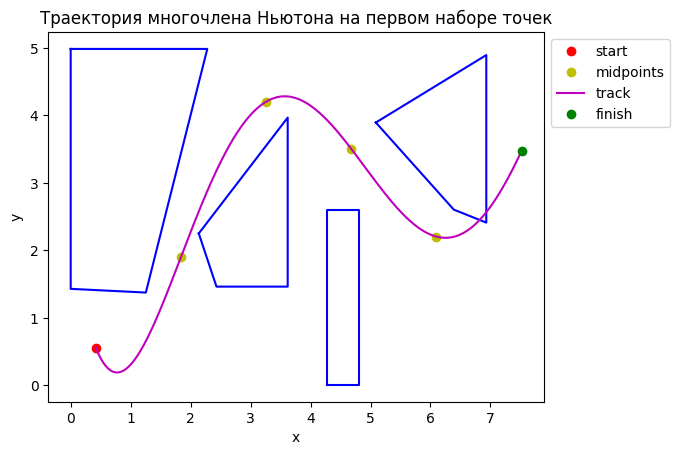

In [347]:
plt.title('Траектория многочлена Ньютона на первом наборе точек')
plt.plot(list(B1[:,0]) + list(B1[:1,0]), list(B1[:,1]) + list(B1[:1,1]), color = 'b')
plt.plot(list(B2[:,0]) + list(B2[:1,0]), list(B2[:,1]) + list(B2[:1,1]), color = 'b')
plt.plot(list(B3[:,0]) + list(B3[:1,0]), list(B3[:,1]) + list(B3[:1,1]), color = 'b')
plt.plot(list(B4[:,0]) + list(B4[:1,0]), list(B4[:,1]) + list(B4[:1,1]), color = 'b')
plt.plot(A[0,0], A[0,1], 'or', label = 'start')
plt.plot(P_list[0,0], P_list[0,1], 'oy', label='midpoints')
for i in range(1, n-1):
  plt.plot(P_list[i,0], P_list[i,1], 'oy')
plt.plot(x_newton_1, y_newton_1, color='m', label='track')
plt.plot(A[1,0], A[1,1], 'og', label = 'finish')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Как видно, в самом начале решение уходит в сторону, а в самом конце траектория зацепляет предмет, так что задача не выполнена.

Переместим точки так, чтобы решение стало допутимым.

## Второй набор точек

In [348]:
n = 5
h = (A[1,0] - A[0,0])/n
P1 = [A[0,0] + 1*h, 2.2]
P2 = [A[0,0] + 2*h, 4.0]
P3 = [A[0,0] + 3*h, 3.4]
P4 = [A[0,0] + 4*h, 1.9]
P_list = np.array([P1, P2, P3, P4])

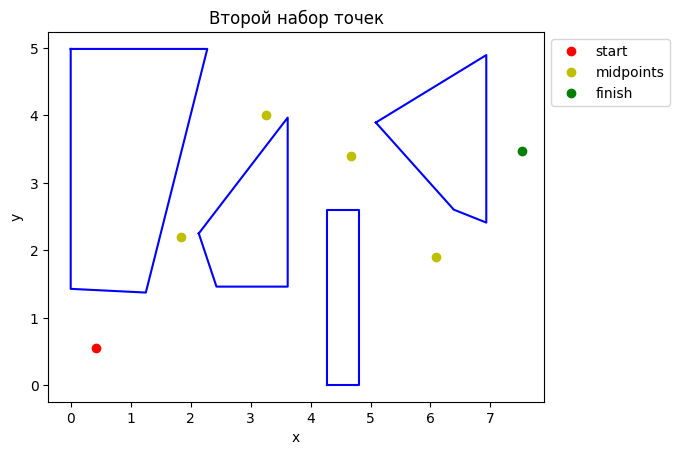

In [349]:
plt.title('Второй набор точек')
plt.plot(list(B1[:,0]) + list(B1[:1,0]), list(B1[:,1]) + list(B1[:1,1]), color = 'b')
plt.plot(list(B2[:,0]) + list(B2[:1,0]), list(B2[:,1]) + list(B2[:1,1]), color = 'b')
plt.plot(list(B3[:,0]) + list(B3[:1,0]), list(B3[:,1]) + list(B3[:1,1]), color = 'b')
plt.plot(list(B4[:,0]) + list(B4[:1,0]), list(B4[:,1]) + list(B4[:1,1]), color = 'b')
plt.plot(A[0,0], A[0,1], 'or', label = 'start')
plt.plot(P_list[0,0], P_list[0,1], 'oy', label='midpoints')
for i in range(1, n-1):
  plt.plot(P_list[i,0], P_list[i,1], 'oy')
plt.plot(A[1,0], A[1,1], 'og', label = 'finish')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Интерполяция зависимоти x(t)

In [350]:
h = 1
t_list = list(range(n+1))
t_list

[0, 1, 2, 3, 4, 5]

Таблица разделённой разности

In [351]:
point_list = np.array([A[0]] + list(P_list) + [A[-1]])
point_list[:,1] = point_list[:,0]
point_list[:,0] = t_list
difference = point_list[:,1]
polynom_coefs = [difference[0]]
difference_table = [np.array(difference).round(5)]
for k in range(n):
  difference = (difference[1:] - difference[:-1])
  polynom_coefs.append(difference[0])
  difference_table.append((k+1)*[' '] + list(difference.round(5)))
np.array(polynom_coefs).round(5)

array([0.42, 1.42, 0.  , 0.  , 0.  , 0.  ])

In [352]:
difference_table = np.array(difference_table).T
difference_table = pd.DataFrame(difference_table, columns=[f'dy_{i}' for i in range(n+1)]).reset_index(drop=True)
difference_table

,dy_0,dy_1,dy_2,dy_3,dy_4,dy_5
0,0.42,,,,,
1,1.84,1.42,,,,
2,3.26,1.42,0.0,,,
3,4.68,1.42,0.0,0.0,,
4,6.1,1.42,0.0,0.0,0.0,
5,7.52,1.42,0.0,0.0,0.0,0.0


Интерполяционный многочлен Ньютона

In [353]:
q = lambda x: (x-point_list[0,0])/h
f_newton = lambda x: sum([polynom_coefs[k] * np.math.prod([q(x)-i for i in range(k)]) / np.math.factorial(k) for k in range(n+1)])

Посмотрим зависимость x(t)

In [354]:
x_newton = np.arange(point_list[0,0], point_list[-1,0], 0.001)
y_newton = list(map(f_newton, x_newton))

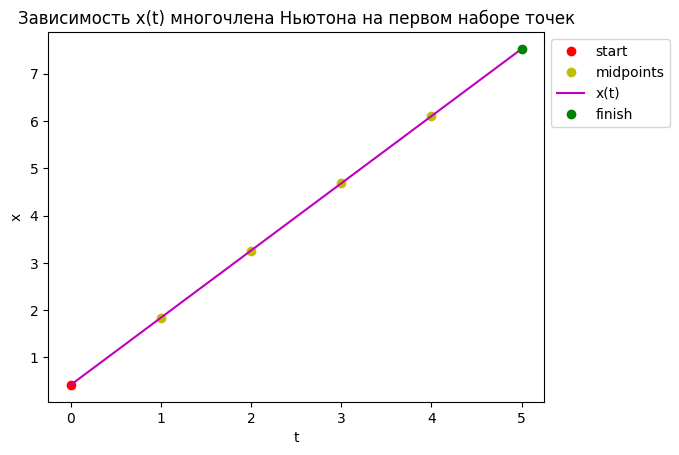

In [355]:
plt.title('Зависимость x(t) многочлена Ньютона на втором наборе точек')
plt.plot(point_list[0,0], point_list[0,1], 'or', label = 'start')
plt.plot(point_list[1,0], point_list[1,1], 'oy', label='midpoints')
for i in range(2, n):
  plt.plot(point_list[i,0], point_list[i,1], 'oy')
plt.plot(x_newton, y_newton, color='m', label='x(t)')
plt.plot(point_list[-1,0], point_list[-1,1], 'og', label = 'finish')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('t')
plt.ylabel('x')
plt.show()

Зависимость линейная, так как брали равно удалённые узлы

### Интерполяция зависимоти y(t)

Таблица разделённой разности

In [356]:
point_list = np.array([A[0]] + list(P_list) + [A[-1]])
point_list[:,0] = t_list
difference = point_list[:,1]
polynom_coefs = [difference[0]]
difference_table = [np.array(difference).round(5)]
for k in range(n):
  difference = (difference[1:] - difference[:-1])
  polynom_coefs.append(difference[0])
  difference_table.append((k+1)*[' '] + list(difference.round(5)))
np.array(polynom_coefs).round(5)

array([ 0.55,  1.65,  0.15, -2.55,  4.05, -1.58])

In [357]:
difference_table = np.array(difference_table).T
difference_table = pd.DataFrame(difference_table, columns=[f'dy_{i}' for i in range(n+1)]).reset_index(drop=True)
difference_table

,dy_0,dy_1,dy_2,dy_3,dy_4,dy_5
0,0.55,,,,,
1,2.2,1.65,,,,
2,4.0,1.8,0.15,,,
3,3.4,-0.6,-2.4,-2.55,,
4,1.9,-1.5,-0.9,1.5,4.05,
5,3.47,1.57,3.07,3.97,2.47,-1.58


Интерполяционный многочлен Ньютона

In [358]:
q = lambda x: (x-point_list[0,0])/h
f_newton = lambda x: sum([polynom_coefs[k] * np.math.prod([q(x)-i for i in range(k)]) / np.math.factorial(k) for k in range(n+1)])

Посмотрим зависимость y(t)

In [359]:
x_newton = np.arange(point_list[0,0], point_list[-1,0], 0.001)
y_newton = list(map(f_newton, x_newton))

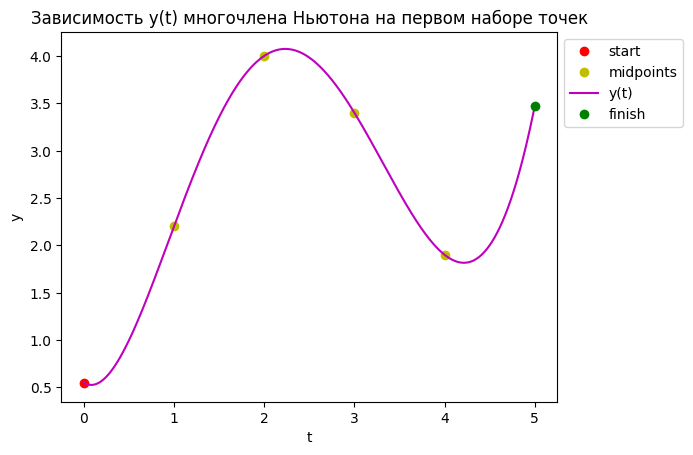

In [360]:
plt.title('Зависимость y(t) многочлена Ньютона на втором наборе точек')
plt.plot(point_list[0,0], point_list[0,1], 'or', label = 'start')
plt.plot(point_list[1,0], point_list[1,1], 'oy', label='midpoints')
for i in range(2, n):
  plt.plot(point_list[i,0], point_list[i,1], 'oy')
plt.plot(x_newton, y_newton, color='m', label='y(t)')
plt.plot(point_list[-1,0], point_list[-1,1], 'og', label = 'finish')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('t')
plt.ylabel('y')
plt.show()

### Интерполяция зависимоти y(x)

In [361]:
h = (A[1,0] - A[0,0])/n

Таблица разделённой разности

In [362]:
point_list = np.array([A[0]] + list(P_list) + [A[-1]])
difference = point_list[:,1]
polynom_coefs = [difference[0]]
difference_table = [np.array(difference).round(5)]
for k in range(n):
  difference = (difference[1:] - difference[:-1])
  polynom_coefs.append(difference[0])
  difference_table.append((k+1)*[' '] + list(difference.round(5)))
np.array(polynom_coefs).round(5)

array([ 0.55,  1.65,  0.15, -2.55,  4.05, -1.58])

In [363]:
difference_table = np.array(difference_table).T
difference_table = pd.DataFrame(difference_table, columns=[f'dy_{i}' for i in range(n+1)]).reset_index(drop=True)
difference_table

,dy_0,dy_1,dy_2,dy_3,dy_4,dy_5
0,0.55,,,,,
1,2.2,1.65,,,,
2,4.0,1.8,0.15,,,
3,3.4,-0.6,-2.4,-2.55,,
4,1.9,-1.5,-0.9,1.5,4.05,
5,3.47,1.57,3.07,3.97,2.47,-1.58


Интерполяционный многочлен Ньютона

In [364]:
q = lambda x: (x-A[0,0])/h
f_newton = lambda x: sum([polynom_coefs[k] * np.math.prod([q(x)-i for i in range(k)]) / np.math.factorial(k) for k in range(n+1)])

Посмотрим траекторию

In [365]:
x_newton_2 = np.arange(A[0,0], A[1,0], 0.001)
y_newton_2 = list(map(f_newton, x_newton_2))

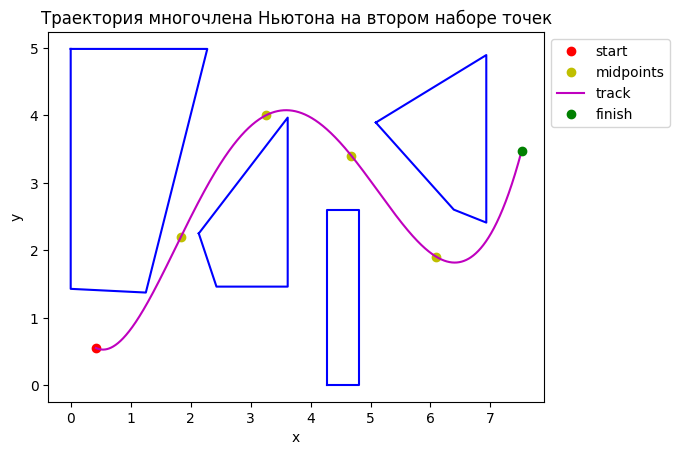

In [366]:
plt.title('Траектория многочлена Ньютона на втором наборе точек')
plt.plot(list(B1[:,0]) + list(B1[:1,0]), list(B1[:,1]) + list(B1[:1,1]), color = 'b')
plt.plot(list(B2[:,0]) + list(B2[:1,0]), list(B2[:,1]) + list(B2[:1,1]), color = 'b')
plt.plot(list(B3[:,0]) + list(B3[:1,0]), list(B3[:,1]) + list(B3[:1,1]), color = 'b')
plt.plot(list(B4[:,0]) + list(B4[:1,0]), list(B4[:,1]) + list(B4[:1,1]), color = 'b')
plt.plot(A[0,0], A[0,1], 'or', label = 'start')
plt.plot(P_list[0,0], P_list[0,1], 'oy', label='midpoints')
for i in range(1, n-1):
  plt.plot(P_list[i,0], P_list[i,1], 'oy')
plt.plot(x_newton_2, y_newton_2, color='m', label='track')
plt.plot(A[1,0], A[1,1], 'og', label = 'finish')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Теперь решение полностью удовлетворяет условию задачи

## Решение с помощью интерполяционного многочлена Ньютона-Эрмита

## Первый набор точек и производных в них

In [367]:
n = 5
h = (A[1,0] - A[0,0])/n
P1 = [A[0,0] + 1*h, 1.9]
P2 = [A[0,0] + 2*h, 4.2]
P3 = [A[0,0] + 3*h, 3.5]
P4 = [A[0,0] + 4*h, 2.2]
P_list = np.array([P1, P2, P3, P4])

In [368]:
point_list = np.array([A[0]] + list(P_list) + [A[-1]])

In [369]:
dP1 = 2.6
dP2 = 0.
dP3 = -1.
dP4 = -0.5
dP_list = np.array([0, dP1, dP2, dP3, dP4, 0])

In [370]:
okr = 0.2
dP_x = [np.arange(point_list[i,0] - okr, point_list[i,0] + okr, 0.001) for i in range(n+1)]
dP_y = [[dP_list[i]*(x - point_list[i,0]) + point_list[i,1] for x in dP_x[i]] for i in range(n+1)]

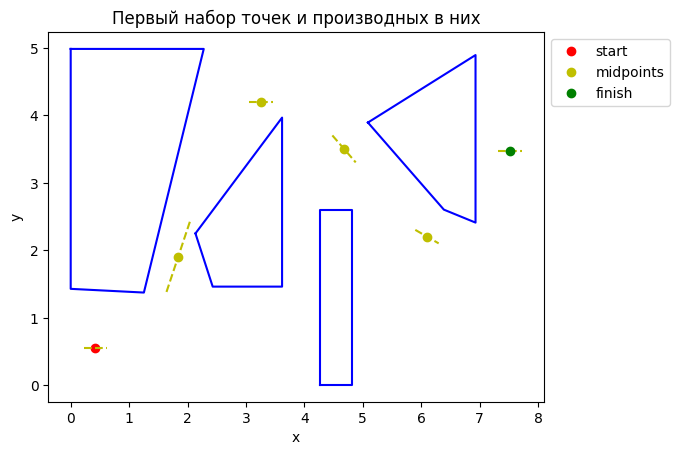

In [371]:
plt.title('Первый набор точек и производных в них')
plt.plot(list(B1[:,0]) + list(B1[:1,0]), list(B1[:,1]) + list(B1[:1,1]), color = 'b')
plt.plot(list(B2[:,0]) + list(B2[:1,0]), list(B2[:,1]) + list(B2[:1,1]), color = 'b')
plt.plot(list(B3[:,0]) + list(B3[:1,0]), list(B3[:,1]) + list(B3[:1,1]), color = 'b')
plt.plot(list(B4[:,0]) + list(B4[:1,0]), list(B4[:,1]) + list(B4[:1,1]), color = 'b')
plt.plot(A[0,0], A[0,1], 'or', label = 'start')
plt.plot(P_list[0,0], P_list[0,1], 'oy', label='midpoints')
for i in range(1, n-1):
  plt.plot(P_list[i,0], P_list[i,1], 'oy')
for i in range(n+1):
  plt.plot(dP_x[i], dP_y[i], '--y')
plt.plot(A[1,0], A[1,1], 'og', label = 'finish')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Интерполяция зависимоти x(t)

In [372]:
h = 1
t_list = list(range(n+1))
t_list

[0, 1, 2, 3, 4, 5]

In [373]:
dP1 = 1
dP2 = 1
dP3 = 1
dP4 = 1
dP_list = np.array([0, dP1, dP2, dP3, dP4, 0])

In [374]:
point_list = np.array([A[0]] + list(P_list) + [A[-1]])
point_list[:,1] = point_list[:,0]
point_list[:,0] = t_list

Таблица разделённой разности

In [375]:
point_list_diff_x = []
for i in range(n+1):
  point_list_diff_x.append(point_list[i,0])
  point_list_diff_x.append(point_list[i,0])
point_list_diff_y = []
for i in range(n+1):
  point_list_diff_y.append(point_list[i,1])
  point_list_diff_y.append(dP_list[i])

difference_1 = point_list_diff_y
polynom_coefs = [difference_1[0]]
difference_table = [np.array(difference_1).round(5)]

diff2 = ((point_list[1:,1] - point_list[:-1,1]) / h)
difference_2 = [dP_list[0]]
for i in range(1, n+1):
  difference_2.append(diff2[i-1])
  difference_2.append(dP_list[i])
polynom_coefs.append(difference_2[0])
difference_table.append([' '] + list(np.array(difference_2).round(5)))

difference = np.array(difference_2)
for k in range(2*n):
  if k%2==0:
    x_list = np.array((len(difference)-1)*[h*(k+2)/2])
  else:
    x_list = np.array([h*((k+2)//2) if i%2==0 else (h*((k+2)//2+1)) for i in range(len(difference)-1)])
  difference = ((difference[1:] - difference[:-1]) / x_list)
  polynom_coefs.append(difference[0])
  difference_table.append((k+2)*[' '] + list(difference.round(5)))
np.array(polynom_coefs).round(5)

array([ 0.42   ,  0.     ,  1.42   , -1.84   ,  1.13   , -0.88   ,
        0.43333, -0.26111,  0.10903, -0.05278,  0.01872, -0.00749])

In [376]:
difference_table = np.array(difference_table).T
difference_table = pd.DataFrame(difference_table)
difference_table

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.42,,,,,,,,,,,
1,0.0,0.0,,,,,,,,,,
2,1.84,1.42,1.42,,,,,,,,,
3,1.0,1.0,-0.42,-1.84,,,,,,,,
4,3.26,1.42,0.42,0.42,1.13,,,,,,,
5,1.0,1.0,-0.42,-0.84,-0.63,-0.88,,,,,,
6,4.68,1.42,0.42,0.42,0.63,0.42,0.43333,,,,,
7,1.0,1.0,-0.42,-0.84,-0.63,-0.63,-0.35,-0.26111,,,,
8,6.1,1.42,0.42,0.42,0.63,0.42,0.35,0.175,0.10903,,,
9,1.0,1.0,-0.42,-0.84,-0.63,-0.63,-0.35,-0.23333,-0.10208,-0.05278,,


Интерполяционный многочлен Ньютона-Эрмита

In [377]:
def f_newton_hermit(x):
  polynom = []
  for k in range(2*(n+1)):
    x_prod = 1
    for i in range(k):
      x_prod *= x - point_list[i//2,0]
    polynom.append(polynom_coefs[k] * x_prod)
  return sum(polynom)

Посмотрим зависимость x(t)

In [378]:
x_newton = np.arange(point_list[0,0], point_list[-1,0], 0.001)
y_newton = list(map(f_newton_hermit, x_newton))

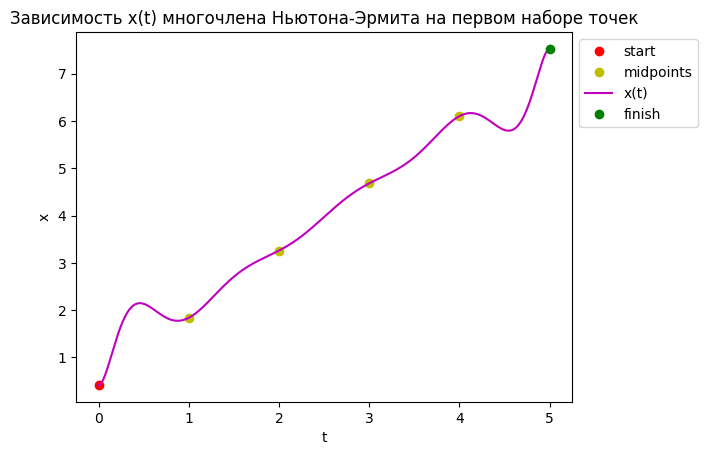

In [379]:
plt.title('Зависимость x(t) многочлена Ньютона-Эрмита на первом наборе точек')
plt.plot(point_list[0,0], point_list[0,1], 'or', label = 'start')
plt.plot(point_list[1,0], point_list[1,1], 'oy', label='midpoints')
for i in range(2, n):
  plt.plot(point_list[i,0], point_list[i,1], 'oy')
plt.plot(x_newton, y_newton, color='m', label='x(t)')
plt.plot(point_list[-1,0], point_list[-1,1], 'og', label = 'finish')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('t')
plt.ylabel('x')
plt.show()

### Интерполяция зависимоти y(t)

In [380]:
h = 1
t_list = list(range(n+1))
t_list

[0, 1, 2, 3, 4, 5]

In [381]:
dP1 = 2.6
dP2 = 0.
dP3 = -1.
dP4 = -0.5
dP_list = np.array([0, dP1, dP2, dP3, dP4, 0])

In [382]:
point_list = np.array([A[0]] + list(P_list) + [A[-1]])
point_list[:,0] = t_list

Таблица разделённой разности

In [383]:
point_list_diff_x = []
for i in range(n+1):
  point_list_diff_x.append(point_list[i,0])
  point_list_diff_x.append(point_list[i,0])
point_list_diff_y = []
for i in range(n+1):
  point_list_diff_y.append(point_list[i,1])
  point_list_diff_y.append(dP_list[i])

difference_1 = point_list_diff_y
polynom_coefs = [difference_1[0]]
difference_table = [np.array(difference_1).round(5)]

diff2 = ((point_list[1:,1] - point_list[:-1,1]) / h)
difference_2 = [dP_list[0]]
for i in range(1, n+1):
  difference_2.append(diff2[i-1])
  difference_2.append(dP_list[i])
polynom_coefs.append(difference_2[0])
difference_table.append([' '] + list(np.array(difference_2).round(5)))

difference = np.array(difference_2)
for k in range(2*n):
  if k%2==0:
    x_list = np.array((len(difference)-1)*[h*(k+2)/2])
  else:
    x_list = np.array([h*((k+2)//2) if i%2==0 else (h*((k+2)//2+1)) for i in range(len(difference)-1)])
  difference = ((difference[1:] - difference[:-1]) / x_list)
  polynom_coefs.append(difference[0])
  difference_table.append((k+2)*[' '] + list(difference.round(5)))
np.array(polynom_coefs).round(5)

array([ 0.55   ,  0.     ,  1.35   , -0.1    , -0.3375 , -0.1375 ,
        0.26944, -0.25324,  0.11062, -0.04243,  0.01046, -0.00211])

In [384]:
difference_table = np.array(difference_table).T
difference_table = pd.DataFrame(difference_table)
difference_table

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.55,,,,,,,,,,,
1,0.0,0.0,,,,,,,,,,
2,1.9,1.35,1.35,,,,,,,,,
3,2.6,2.6,1.25,-0.1,,,,,,,,
4,4.2,2.3,-0.3,-0.775,-0.3375,,,,,,,
5,0.0,0.0,-2.3,-2.0,-0.6125,-0.1375,,,,,,
6,3.5,-0.7,-0.7,0.8,1.4,0.67083,0.26944,,,,,
7,-1.0,-1.0,-0.3,0.4,-0.2,-0.8,-0.49028,-0.25324,,,,
8,2.2,-1.3,-0.3,0.0,-0.2,-0.0,0.26667,0.18924,0.11062,,,
9,-0.5,-0.5,0.8,1.1,0.55,0.375,0.125,-0.04722,-0.05911,-0.04243,,


Интерполяционный многочлен Ньютона-Эрмита

In [385]:
def f_newton_hermit(x):
  polynom = []
  for k in range(2*(n+1)):
    x_prod = 1
    for i in range(k):
      x_prod *= x - point_list[i//2,0]
    polynom.append(polynom_coefs[k] * x_prod)
  return sum(polynom)

Посмотрим зависимость y(t)

In [386]:
x_newton = np.arange(point_list[0,0], point_list[-1,0], 0.001)
y_newton = list(map(f_newton_hermit, x_newton))

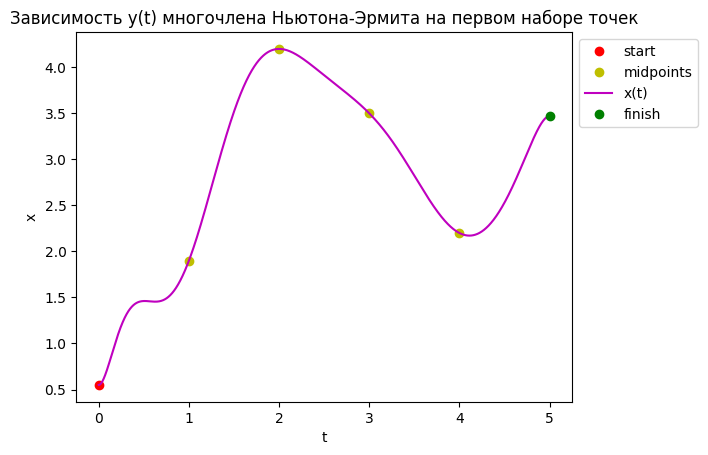

In [387]:
plt.title('Зависимость y(t) многочлена Ньютона-Эрмита на первом наборе точек')
plt.plot(point_list[0,0], point_list[0,1], 'or', label = 'start')
plt.plot(point_list[1,0], point_list[1,1], 'oy', label='midpoints')
for i in range(2, n):
  plt.plot(point_list[i,0], point_list[i,1], 'oy')
plt.plot(x_newton, y_newton, color='m', label='x(t)')
plt.plot(point_list[-1,0], point_list[-1,1], 'og', label = 'finish')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('t')
plt.ylabel('x')
plt.show()

### Интерполяция зависимоти y(x)

In [388]:
h = (A[1,0] - A[0,0])/n

In [389]:
point_list = np.array([A[0]] + list(P_list) + [A[-1]])

Таблица разделённой разности

In [390]:
point_list_diff_x = []
for i in range(n+1):
  point_list_diff_x.append(point_list[i,0])
  point_list_diff_x.append(point_list[i,0])
point_list_diff_y = []
for i in range(n+1):
  point_list_diff_y.append(point_list[i,1])
  point_list_diff_y.append(dP_list[i])

difference_1 = point_list_diff_y
polynom_coefs = [difference_1[0]]
difference_table = [np.array(difference_1).round(5)]

diff2 = ((point_list[1:,1] - point_list[:-1,1]) / h)
difference_2 = [dP_list[0]]
for i in range(1, n+1):
  difference_2.append(diff2[i-1])
  difference_2.append(dP_list[i])
polynom_coefs.append(difference_2[0])
difference_table.append([' '] + list(np.array(difference_2).round(5)))

difference = np.array(difference_2)
for k in range(2*n):
  if k%2==0:
    x_list = np.array((len(difference)-1)*[h*(k+2)/2])
  else:
    x_list = np.array([h*((k+2)//2) if i%2==0 else (h*((k+2)//2+1)) for i in range(len(difference)-1)])
  difference = ((difference[1:] - difference[:-1]) / x_list)
  polynom_coefs.append(difference[0])
  difference_table.append((k+2)*[' '] + list(difference.round(5)))
np.array(polynom_coefs).round(5)

array([ 5.5000e-01,  0.0000e+00,  6.6951e-01,  3.4645e-01, -3.5159e-01,
        1.6532e-01, -3.3730e-02,  7.0000e-04,  1.8900e-03, -1.0300e-03,
        2.7000e-04, -7.0000e-05])

In [391]:
difference_table = np.array(difference_table).T
difference_table = pd.DataFrame(difference_table)
difference_table

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.55,,,,,,,,,,,
1,0.0,0.0,,,,,,,,,,
2,1.9,0.9507,0.66951,,,,,,,,,
3,2.6,2.6,1.16148,0.34645,,,,,,,,
4,4.2,1.61972,-0.69034,-0.65205,-0.35159,,,,,,,
5,0.0,0.0,-1.14065,-0.31712,0.11793,0.16532,,,,,,
6,3.5,-0.49296,-0.34715,0.2794,0.21004,0.02162,-0.03373,,,,,
7,-1.0,-1.0,-0.35707,-0.00698,-0.10084,-0.10947,-0.03077,0.0007,,,,
8,2.2,-0.91549,0.05951,0.14668,0.05411,0.03637,0.03423,0.01144,0.00189,,,
9,-0.5,-0.5,0.2926,0.16415,0.00615,-0.01689,-0.0125,-0.01097,-0.00395,-0.00103,,


Интерполяционный многочлен Ньютона-Эрмита

In [392]:
def f_newton_hermit(x):
  polynom = []
  for k in range(2*(n+1)):
    x_prod = 1
    for i in range(k):
      x_prod *= x - point_list[i//2,0]
    polynom.append(polynom_coefs[k] * x_prod)
  return sum(polynom)

Посмотрим траекторию

In [393]:
x_newton_hermit_1 = np.arange(A[0,0], A[1,0], 0.001)
y_newton_hermit_1 = list(map(f_newton_hermit, x_newton_hermit_1))

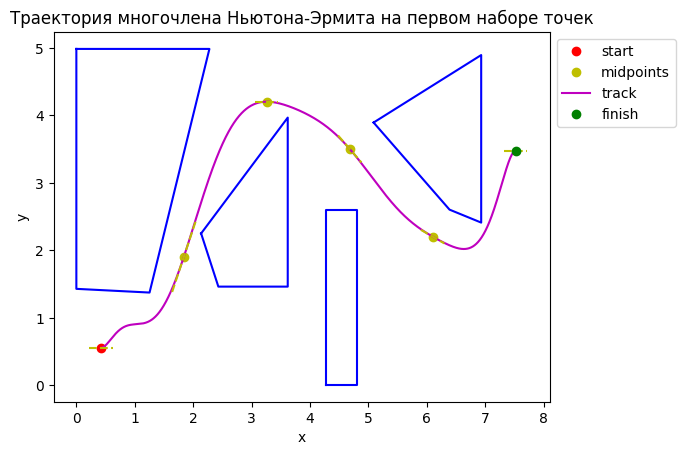

In [394]:
plt.title('Траектория многочлена Ньютона-Эрмита на первом наборе точек')
plt.plot(list(B1[:,0]) + list(B1[:1,0]), list(B1[:,1]) + list(B1[:1,1]), color = 'b')
plt.plot(list(B2[:,0]) + list(B2[:1,0]), list(B2[:,1]) + list(B2[:1,1]), color = 'b')
plt.plot(list(B3[:,0]) + list(B3[:1,0]), list(B3[:,1]) + list(B3[:1,1]), color = 'b')
plt.plot(list(B4[:,0]) + list(B4[:1,0]), list(B4[:,1]) + list(B4[:1,1]), color = 'b')
plt.plot(A[0,0], A[0,1], 'or', label = 'start')
plt.plot(P_list[0,0], P_list[0,1], 'oy', label='midpoints')
for i in range(1, n-1):
  plt.plot(P_list[i,0], P_list[i,1], 'oy')
plt.plot(x_newton_hermit_1, y_newton_hermit_1, color='m', label='track')
for i in range(n+1):
  plt.plot(dP_x[i], dP_y[i], '--y')
plt.plot(A[1,0], A[1,1], 'og', label = 'finish')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Второй набор точек и производных в них

In [395]:
n = 5
h = (A[1,0] - A[0,0])/n
P1 = [A[0,0] + 1*h, 2.2]
P2 = [A[0,0] + 2*h, 4.0]
P3 = [A[0,0] + 3*h, 3.4]
P4 = [A[0,0] + 4*h, 1.9]
P_list = np.array([P1, P2, P3, P4])

In [396]:
point_list = np.array([A[0]] + list(P_list) + [A[-1]])

In [397]:
dP1 = 2.2
dP2 = 0.3
dP3 = -1.5
dP4 = -0.2
dP_list = np.array([0, dP1, dP2, dP3, dP4, 0])

In [398]:
okr = 0.2
dP_x = [np.arange(point_list[i,0] - okr, point_list[i,0] + okr, 0.001) for i in range(n+1)]
dP_y = [[dP_list[i]*(x - point_list[i,0]) + point_list[i,1] for x in dP_x[i]] for i in range(n+1)]

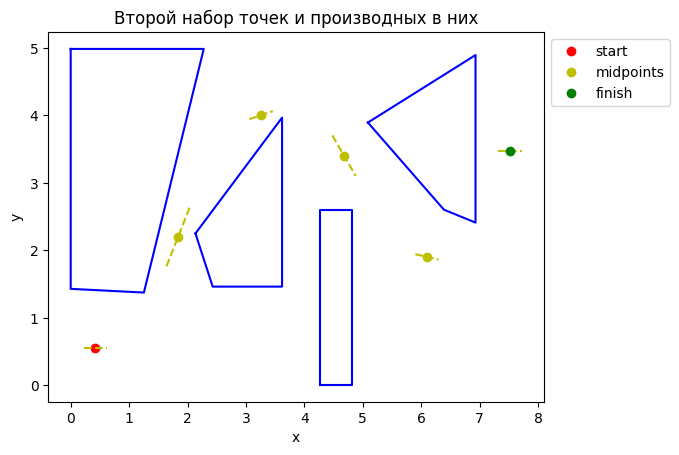

In [399]:
plt.title('Второй набор точек и производных в них')
plt.plot(list(B1[:,0]) + list(B1[:1,0]), list(B1[:,1]) + list(B1[:1,1]), color = 'b')
plt.plot(list(B2[:,0]) + list(B2[:1,0]), list(B2[:,1]) + list(B2[:1,1]), color = 'b')
plt.plot(list(B3[:,0]) + list(B3[:1,0]), list(B3[:,1]) + list(B3[:1,1]), color = 'b')
plt.plot(list(B4[:,0]) + list(B4[:1,0]), list(B4[:,1]) + list(B4[:1,1]), color = 'b')
plt.plot(A[0,0], A[0,1], 'or', label = 'start')
plt.plot(P_list[0,0], P_list[0,1], 'oy', label='midpoints')
for i in range(1, n-1):
  plt.plot(P_list[i,0], P_list[i,1], 'oy')
for i in range(n+1):
  plt.plot(dP_x[i], dP_y[i], '--y')
plt.plot(A[1,0], A[1,1], 'og', label = 'finish')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Интерполяция зависимоти x(t)

In [400]:
h = 1
t_list = list(range(n+1))
t_list

[0, 1, 2, 3, 4, 5]

In [401]:
dP1 = 1
dP2 = 1
dP3 = 1
dP4 = 1
dP_list = np.array([0, dP1, dP2, dP3, dP4, 0])

In [402]:
point_list = np.array([A[0]] + list(P_list) + [A[-1]])
point_list[:,1] = point_list[:,0]
point_list[:,0] = t_list

Таблица разделённой разности

In [403]:
point_list_diff_x = []
for i in range(n+1):
  point_list_diff_x.append(point_list[i,0])
  point_list_diff_x.append(point_list[i,0])
point_list_diff_y = []
for i in range(n+1):
  point_list_diff_y.append(point_list[i,1])
  point_list_diff_y.append(dP_list[i])

difference_1 = point_list_diff_y
polynom_coefs = [difference_1[0]]
difference_table = [np.array(difference_1).round(5)]

diff2 = ((point_list[1:,1] - point_list[:-1,1]) / h)
difference_2 = [dP_list[0]]
for i in range(1, n+1):
  difference_2.append(diff2[i-1])
  difference_2.append(dP_list[i])
polynom_coefs.append(difference_2[0])
difference_table.append([' '] + list(np.array(difference_2).round(5)))

difference = np.array(difference_2)
for k in range(2*n):
  if k%2==0:
    x_list = np.array((len(difference)-1)*[h*(k+2)/2])
  else:
    x_list = np.array([h*((k+2)//2) if i%2==0 else (h*((k+2)//2+1)) for i in range(len(difference)-1)])
  difference = ((difference[1:] - difference[:-1]) / x_list)
  polynom_coefs.append(difference[0])
  difference_table.append((k+2)*[' '] + list(difference.round(5)))
np.array(polynom_coefs).round(5)

array([ 0.42   ,  0.     ,  1.42   , -1.84   ,  1.13   , -0.88   ,
        0.43333, -0.26111,  0.10903, -0.05278,  0.01872, -0.00749])

In [404]:
difference_table = np.array(difference_table).T
difference_table = pd.DataFrame(difference_table)
difference_table

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.42,,,,,,,,,,,
1,0.0,0.0,,,,,,,,,,
2,1.84,1.42,1.42,,,,,,,,,
3,1.0,1.0,-0.42,-1.84,,,,,,,,
4,3.26,1.42,0.42,0.42,1.13,,,,,,,
5,1.0,1.0,-0.42,-0.84,-0.63,-0.88,,,,,,
6,4.68,1.42,0.42,0.42,0.63,0.42,0.43333,,,,,
7,1.0,1.0,-0.42,-0.84,-0.63,-0.63,-0.35,-0.26111,,,,
8,6.1,1.42,0.42,0.42,0.63,0.42,0.35,0.175,0.10903,,,
9,1.0,1.0,-0.42,-0.84,-0.63,-0.63,-0.35,-0.23333,-0.10208,-0.05278,,


Интерполяционный многочлен Ньютона-Эрмита

In [405]:
def f_newton_hermit(x):
  polynom = []
  for k in range(2*(n+1)):
    x_prod = 1
    for i in range(k):
      x_prod *= x - point_list[i//2,0]
    polynom.append(polynom_coefs[k] * x_prod)
  return sum(polynom)

Посмотрим зависимость x(t)

In [406]:
x_newton = np.arange(point_list[0,0], point_list[-1,0], 0.001)
y_newton = list(map(f_newton_hermit, x_newton))

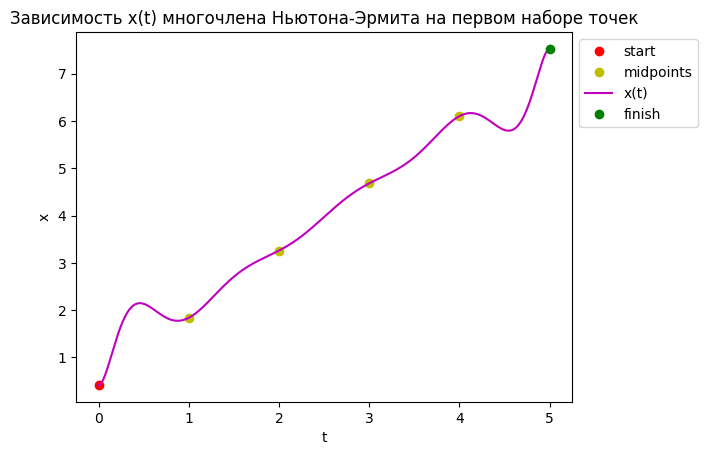

In [407]:
plt.title('Зависимость x(t) многочлена Ньютона-Эрмита на втором наборе точек')
plt.plot(point_list[0,0], point_list[0,1], 'or', label = 'start')
plt.plot(point_list[1,0], point_list[1,1], 'oy', label='midpoints')
for i in range(2, n):
  plt.plot(point_list[i,0], point_list[i,1], 'oy')
plt.plot(x_newton, y_newton, color='m', label='x(t)')
plt.plot(point_list[-1,0], point_list[-1,1], 'og', label = 'finish')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('t')
plt.ylabel('x')
plt.show()

### Интерполяция зависимоти y(t)

In [408]:
h = 1
t_list = list(range(n+1))
t_list

[0, 1, 2, 3, 4, 5]

In [409]:
dP1 = 2.2
dP2 = 0.3
dP3 = -1.5
dP4 = -0.2
dP_list = np.array([0, dP1, dP2, dP3, dP4, 0])

In [410]:
point_list = np.array([A[0]] + list(P_list) + [A[-1]])
point_list[:,0] = t_list

Таблица разделённой разности

In [411]:
point_list_diff_x = []
for i in range(n+1):
  point_list_diff_x.append(point_list[i,0])
  point_list_diff_x.append(point_list[i,0])
point_list_diff_y = []
for i in range(n+1):
  point_list_diff_y.append(point_list[i,1])
  point_list_diff_y.append(dP_list[i])

difference_1 = point_list_diff_y
polynom_coefs = [difference_1[0]]
difference_table = [np.array(difference_1).round(5)]

diff2 = ((point_list[1:,1] - point_list[:-1,1]) / h)
difference_2 = [dP_list[0]]
for i in range(1, n+1):
  difference_2.append(diff2[i-1])
  difference_2.append(dP_list[i])
polynom_coefs.append(difference_2[0])
difference_table.append([' '] + list(np.array(difference_2).round(5)))

difference = np.array(difference_2)
for k in range(2*n):
  if k%2==0:
    x_list = np.array((len(difference)-1)*[h*(k+2)/2])
  else:
    x_list = np.array([h*((k+2)//2) if i%2==0 else (h*((k+2)//2+1)) for i in range(len(difference)-1)])
  difference = ((difference[1:] - difference[:-1]) / x_list)
  polynom_coefs.append(difference[0])
  difference_table.append((k+2)*[' '] + list(difference.round(5)))
np.array(polynom_coefs).round(5)

array([ 0.55   ,  0.     ,  1.65   , -1.1    ,  0.3125 , -0.3125 ,
        0.21667, -0.15694,  0.06658, -0.02747,  0.00754, -0.00188])

In [412]:
difference_table = np.array(difference_table).T
difference_table = pd.DataFrame(difference_table)
difference_table

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.55,,,,,,,,,,,
1,0.0,0.0,,,,,,,,,,
2,2.2,1.65,1.65,,,,,,,,,
3,2.2,2.2,0.55,-1.1,,,,,,,,
4,4.0,1.8,-0.4,-0.475,0.3125,,,,,,,
5,0.3,0.3,-1.5,-1.1,-0.3125,-0.3125,,,,,,
6,3.4,-0.6,-0.9,0.3,0.7,0.3375,0.21667,,,,,
7,-1.5,-1.5,-0.9,0.0,-0.15,-0.425,-0.25417,-0.15694,,,,
8,1.9,-1.5,0.0,0.45,0.225,0.125,0.18333,0.10937,0.06658,,,
9,-0.2,-0.2,1.3,1.3,0.425,0.1,-0.00833,-0.06389,-0.04332,-0.02747,,


Интерполяционный многочлен Ньютона-Эрмита

In [413]:
def f_newton_hermit(x):
  polynom = []
  for k in range(2*(n+1)):
    x_prod = 1
    for i in range(k):
      x_prod *= x - point_list[i//2,0]
    polynom.append(polynom_coefs[k] * x_prod)
  return sum(polynom)

Посмотрим зависимость y(t)

In [414]:
x_newton = np.arange(point_list[0,0], point_list[-1,0], 0.001)
y_newton = list(map(f_newton_hermit, x_newton))

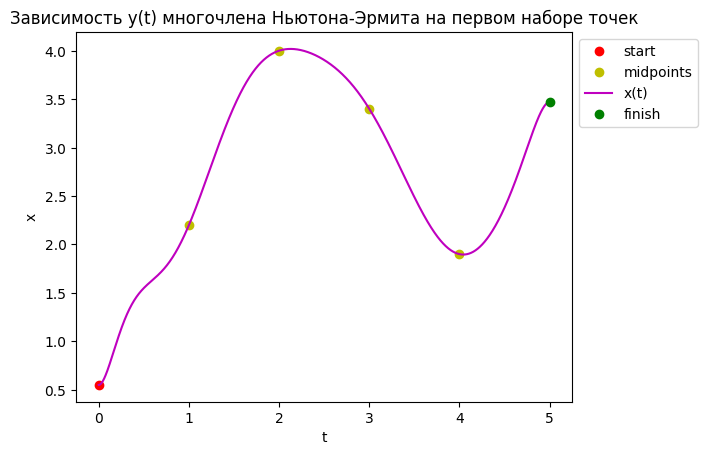

In [415]:
plt.title('Зависимость y(t) многочлена Ньютона-Эрмита на втором наборе точек')
plt.plot(point_list[0,0], point_list[0,1], 'or', label = 'start')
plt.plot(point_list[1,0], point_list[1,1], 'oy', label='midpoints')
for i in range(2, n):
  plt.plot(point_list[i,0], point_list[i,1], 'oy')
plt.plot(x_newton, y_newton, color='m', label='x(t)')
plt.plot(point_list[-1,0], point_list[-1,1], 'og', label = 'finish')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('t')
plt.ylabel('x')
plt.show()

### Интерполяция зависимоти y(x)

In [416]:
h = (A[1,0] - A[0,0])/n

In [417]:
point_list = np.array([A[0]] + list(P_list) + [A[-1]])

Таблица разделённой разности

In [418]:
point_list_diff_x = []
for i in range(n+1):
  point_list_diff_x.append(point_list[i,0])
  point_list_diff_x.append(point_list[i,0])
point_list_diff_y = []
for i in range(n+1):
  point_list_diff_y.append(point_list[i,1])
  point_list_diff_y.append(dP_list[i])

difference_1 = point_list_diff_y
polynom_coefs = [difference_1[0]]
difference_table = [np.array(difference_1).round(5)]

diff2 = ((point_list[1:,1] - point_list[:-1,1]) / h)
difference_2 = [dP_list[0]]
for i in range(1, n+1):
  difference_2.append(diff2[i-1])
  difference_2.append(dP_list[i])
polynom_coefs.append(difference_2[0])
difference_table.append([' '] + list(np.array(difference_2).round(5)))

difference = np.array(difference_2)
for k in range(2*n):
  if k%2==0:
    x_list = np.array((len(difference)-1)*[h*(k+2)/2])
  else:
    x_list = np.array([h*((k+2)//2) if i%2==0 else (h*((k+2)//2+1)) for i in range(len(difference)-1)])
  difference = ((difference[1:] - difference[:-1]) / x_list)
  polynom_coefs.append(difference[0])
  difference_table.append((k+2)*[' '] + list(difference.round(5)))
np.array(polynom_coefs).round(5)

array([ 5.5000e-01,  0.0000e+00,  8.1829e-01, -6.1470e-02, -1.5040e-01,
        1.1137e-01, -3.3770e-02,  7.5600e-03, -5.2000e-04, -4.9000e-04,
        2.2000e-04, -8.0000e-05])

In [419]:
difference_table = np.array(difference_table).T
difference_table = pd.DataFrame(difference_table)
difference_table

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.55,,,,,,,,,,,
1,0.0,0.0,,,,,,,,,,
2,2.2,1.16197,0.81829,,,,,,,,,
3,2.2,2.2,0.73101,-0.06147,,,,,,,,
4,4.0,1.26761,-0.65662,-0.4886,-0.1504,,,,,,,
5,0.3,0.3,-0.68141,-0.01746,0.16589,0.11137,,,,,,
6,3.4,-0.42254,-0.50883,0.06077,0.02755,-0.03248,-0.03377,,,,,
7,-1.5,-1.5,-0.75878,-0.17602,-0.08338,-0.03906,-0.00155,0.00756,,,,
8,1.9,-1.05634,0.31244,0.37719,0.19479,0.0653,0.0245,0.00458,-0.00052,,,
9,-0.2,-0.2,0.60305,0.20466,-0.06075,-0.08998,-0.03645,-0.01431,-0.00333,-0.00049,,


Интерполяционный многочлен Ньютона-Эрмита

In [420]:
def f_newton_hermit(x):
  polynom = []
  for k in range(2*(n+1)):
    x_prod = 1
    for i in range(k):
      x_prod *= x - point_list[i//2,0]
    polynom.append(polynom_coefs[k] * x_prod)
  return sum(polynom)

Посмотрим траекторию

In [421]:
x_newton_hermit_2 = np.arange(A[0,0], A[1,0], 0.001)
y_newton_hermit_2 = list(map(f_newton_hermit, x_newton_hermit_2))

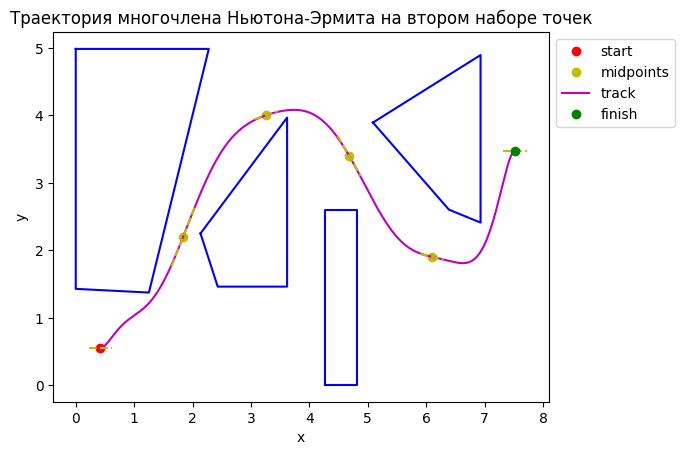

In [422]:
plt.title('Траектория многочлена Ньютона-Эрмита на втором наборе точек')
plt.plot(list(B1[:,0]) + list(B1[:1,0]), list(B1[:,1]) + list(B1[:1,1]), color = 'b')
plt.plot(list(B2[:,0]) + list(B2[:1,0]), list(B2[:,1]) + list(B2[:1,1]), color = 'b')
plt.plot(list(B3[:,0]) + list(B3[:1,0]), list(B3[:,1]) + list(B3[:1,1]), color = 'b')
plt.plot(list(B4[:,0]) + list(B4[:1,0]), list(B4[:,1]) + list(B4[:1,1]), color = 'b')
plt.plot(A[0,0], A[0,1], 'or', label = 'start')
plt.plot(P_list[0,0], P_list[0,1], 'oy', label='midpoints')
for i in range(1, n-1):
  plt.plot(P_list[i,0], P_list[i,1], 'oy')
plt.plot(x_newton_hermit_2, y_newton_hermit_2, color='m', label='track')
for i in range(n+1):
  plt.plot(dP_x[i], dP_y[i], '--y')
plt.plot(A[1,0], A[1,1], 'og', label = 'finish')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Визуально сравним интерполяции

## Первый набор точек и производных в них

In [423]:
n = 5
h = (A[1,0] - A[0,0])/n
P1 = [A[0,0] + 1*h, 1.9]
P2 = [A[0,0] + 2*h, 4.2]
P3 = [A[0,0] + 3*h, 3.5]
P4 = [A[0,0] + 4*h, 2.2]
P_list = np.array([P1, P2, P3, P4])

In [424]:
dP1 = 2.6
dP2 = 0.
dP3 = -1.
dP4 = -0.5
dP_list = np.array([0, dP1, dP2, dP3, dP4, 0])

In [425]:
point_list = np.array([A[0]] + list(P_list) + [A[-1]])

In [426]:
okr = 0.2
dP_x = [np.arange(point_list[i,0] - okr, point_list[i,0] + okr, 0.001) for i in range(n+1)]
dP_y = [[dP_list[i]*(x - point_list[i,0]) + point_list[i,1] for x in dP_x[i]] for i in range(n+1)]

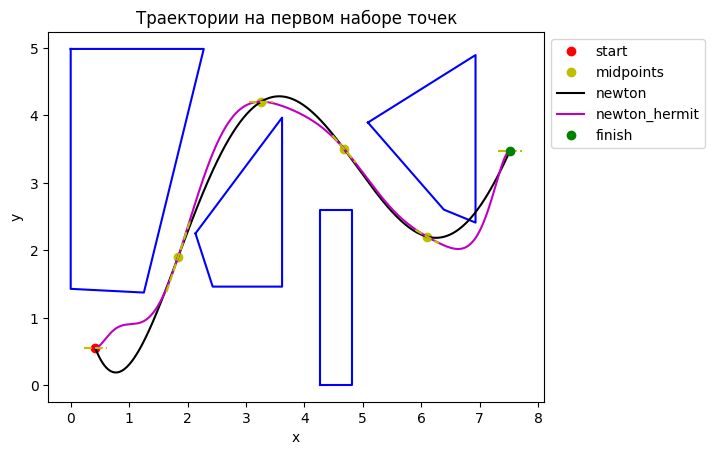

In [427]:
plt.title('Траектории на первом наборе точек')
plt.plot(list(B1[:,0]) + list(B1[:1,0]), list(B1[:,1]) + list(B1[:1,1]), color = 'b')
plt.plot(list(B2[:,0]) + list(B2[:1,0]), list(B2[:,1]) + list(B2[:1,1]), color = 'b')
plt.plot(list(B3[:,0]) + list(B3[:1,0]), list(B3[:,1]) + list(B3[:1,1]), color = 'b')
plt.plot(list(B4[:,0]) + list(B4[:1,0]), list(B4[:,1]) + list(B4[:1,1]), color = 'b')
plt.plot(A[0,0], A[0,1], 'or', label = 'start')
plt.plot(P_list[0,0], P_list[0,1], 'oy', label='midpoints')
for i in range(1, n-1):
  plt.plot(P_list[i,0], P_list[i,1], 'oy')
plt.plot(x_newton_1, y_newton_1, color='k', label='newton')
plt.plot(x_newton_hermit_1, y_newton_hermit_1, color='m', label='newton_hermit')
for i in range(n+1):
  plt.plot(dP_x[i], dP_y[i], '--y')
plt.plot(A[1,0], A[1,1], 'og', label = 'finish')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Второй набор точек и производных в них

In [428]:
n = 5
h = (A[1,0] - A[0,0])/n
P1 = [A[0,0] + 1*h, 2.2]
P2 = [A[0,0] + 2*h, 4.0]
P3 = [A[0,0] + 3*h, 3.4]
P4 = [A[0,0] + 4*h, 1.9]
P_list = np.array([P1, P2, P3, P4])

In [429]:
dP1 = 2.2
dP2 = 0.3
dP3 = -1.5
dP4 = -0.2
dP_list = np.array([0, dP1, dP2, dP3, dP4, 0])

In [430]:
point_list = np.array([A[0]] + list(P_list) + [A[-1]])

In [431]:
okr = 0.2
dP_x = [np.arange(point_list[i,0] - okr, point_list[i,0] + okr, 0.001) for i in range(n+1)]
dP_y = [[dP_list[i]*(x - point_list[i,0]) + point_list[i,1] for x in dP_x[i]] for i in range(n+1)]

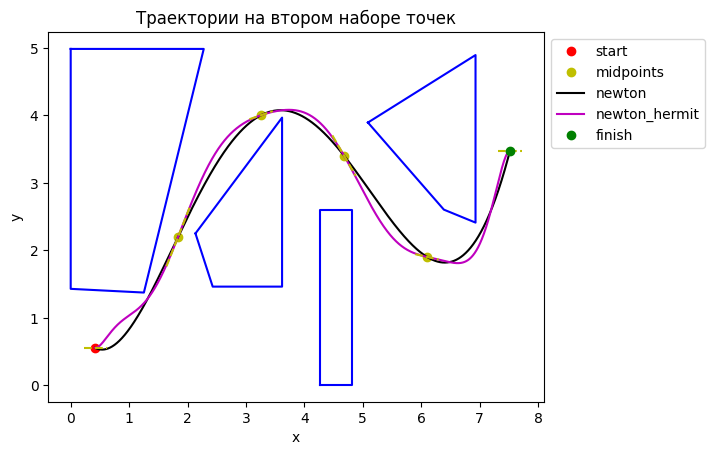

In [432]:
plt.title('Траектории на втором наборе точек')
plt.plot(list(B1[:,0]) + list(B1[:1,0]), list(B1[:,1]) + list(B1[:1,1]), color = 'b')
plt.plot(list(B2[:,0]) + list(B2[:1,0]), list(B2[:,1]) + list(B2[:1,1]), color = 'b')
plt.plot(list(B3[:,0]) + list(B3[:1,0]), list(B3[:,1]) + list(B3[:1,1]), color = 'b')
plt.plot(list(B4[:,0]) + list(B4[:1,0]), list(B4[:,1]) + list(B4[:1,1]), color = 'b')
plt.plot(A[0,0], A[0,1], 'or', label = 'start')
plt.plot(P_list[0,0], P_list[0,1], 'oy', label='midpoints')
for i in range(1, n-1):
  plt.plot(P_list[i,0], P_list[i,1], 'oy')
plt.plot(x_newton_2, y_newton_2, color='k', label='newton')
plt.plot(x_newton_hermit_2, y_newton_hermit_2, color='m', label='newton_hermit')
for i in range(n+1):
  plt.plot(dP_x[i], dP_y[i], '--y')
plt.plot(A[1,0], A[1,1], 'og', label = 'finish')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Интерполяционный многочлен Ньютона-Эрмита справился лучше, так как мы дополнительно регулировали траекторию первыми производными в узловых точках

## Была решена задача построения уравнения движения рабочей точки робота-манипулятора используя многочлены Ньютона и Ньютона-Эрмита по двум наборам узловых точек.